**Gene Expression Analysis - Prostate Cancer**

**1.1    Background**

  - Prostate cancer is a significant global health challenge and a prevalent malignancy in men.
  - In Africa, prostate cancer is the second leading cause of cancer death in men, comprising about 25% of male cancer cases, following lung cancer.
  - Transcriptomic analysis, especially RNA-sequencing, is a powerful tool for understanding gene expression patterns in prostate cancer.
  - High-throughput technologies have enabled comprehensive profiling of the transcriptome, allowing exploration of gene expression alterations in cancerous tissues compared to normal ones.

**1.2    Objective**

  - I wanted to conduct a mini-comparative transcriptomic analysis using supervised and unsupervised ML models. 
  - That is, to develop a predictive ML model that can differentiate between normal and cancerous tissues and potentially be used to predict biomarkers related to prostate cancer.

**1.3  Data Collection and Preprocessing**

   - The dataset used in the study was sourced from https://sbcb.inf.ufrgs.br/
   - The original dataset GSE22260, was submitted to GEO Home - GEO - NCBI (nih.gov) and based on the GPL9115 Illumina Genome Analyzer II platform for Homo sapiens.
   - The experiment involved sequencing the transcriptome (polyA+) of 20 prostate cancer tumors and 10 matched normal tissues using the Illumina GAII platform.

In [1]:
# Directory

import os
os.chdir("C:/Users/ACE/Desktop/Bioinformatics/Private/Private ML Projects/GSE22260.csv")

In [2]:
### Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import axes, pyplot as plt


# Datasets
prca = pd.read_csv("GSE22260.csv")
prca.head()

,ID,class,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
0,SRR057629,1,8.325173,4.461485,6.875699,6.794670,4.447170,4.173517,8.027656,7.372625,...,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505
1,SRR057630,1,7.871684,2.379505,6.765025,7.145403,5.739551,4.665732,7.698306,8.256894,...,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,4.871401,2.379505,2.379505,3.355117
2,SRR057631,1,7.494863,2.379505,6.047563,6.572855,5.131933,5.264843,6.729982,7.765590,...,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505
3,SRR057632,1,7.684648,2.379505,6.226202,7.043074,5.547429,4.821822,7.273357,8.166705,...,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,3.102652
4,SRR057633,1,7.701965,2.379505,6.088784,7.152783,5.101280,4.755094,7.408658,7.889781,...,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,2.379505,3.022125


From the "prca" dataframe above,

   + **ID:** Represents the sample or experimental unit identifier (e.g., SRR057629, SRR057630, SRR057631).
   + **class:** Indicates the class or category associated with each sample (e.g., 1).
   + **Gene IDs - ENSG00000000003, ENSG00000000005:** These columns contain numerical values representing the expression levels of different genes (identified by their Ensembl gene IDs) in each sample.

Each row corresponds to a specific sample, and the values in the columns under the gene IDs represent the expression levels of those genes in the corresponding sample. The numerical values likely indicate the expression abundance or some measure of expression intensity.

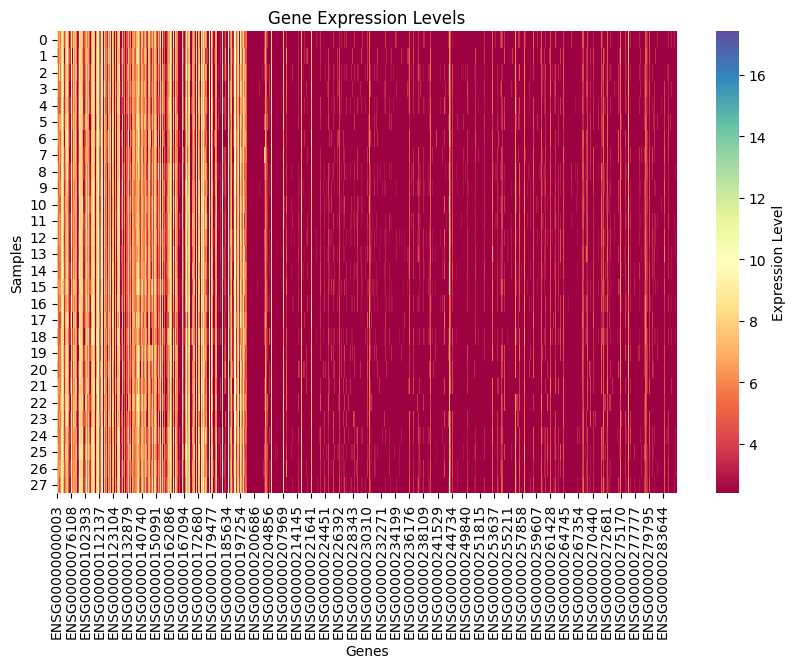

In [3]:
# Visualization 1 - Gene Expression Levels Heatmap

data_for_heatmap = prca.drop(["ID", "class"], axis=1)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_for_heatmap, cmap="Spectral", cbar_kws={'label': 'Expression Level'})
plt.title('Gene Expression Levels')
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.show()

-  The heatmap above provides a visual summary of the variability in gene expression patterns within the prostate cancer samples.
-  Colours in each cell represent gene expression levels, with warmer colors indicating higher expression.
-  We can see that some genes exhibit consistent high expression across all samples, while others show lower expression levels.

In [4]:
# Principal Component Analysis - 1

#Libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# "ID" and "Class" columns dropped
data_for_pca = prca.drop(["ID", "class"], axis=1)

# Standardization
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_for_pca)

# PCA
n_components = min(data_for_pca.shape[0], data_for_pca.shape[1])
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_standardized)

pca_df = pd.DataFrame(data=principal_components, columns=[f"PC{i}" for i in range(1, n_components + 1)])

pca_df["ID"] = prca["ID"]
pca_df["class"] = prca["class"]

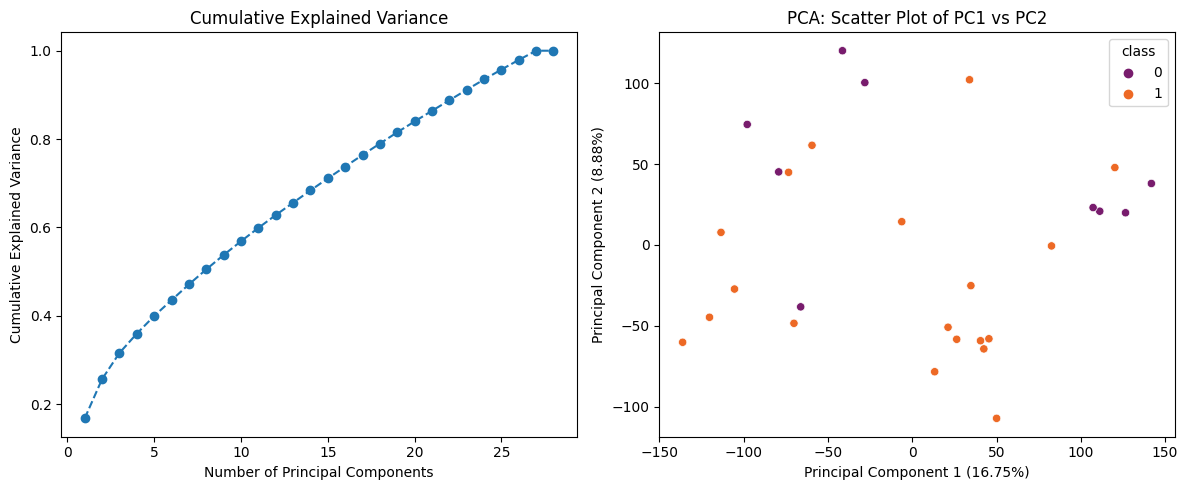

In [5]:
# Visualization 2 - Principal Component Analysis - 2

# Explained Variance subplot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(12, 5))  # Adjust the overall figure size as needed

plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot in the first position
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# 2D Scatter Plot subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot in the second position
sns.scatterplot(x="PC1", y="PC2", hue="class", data=pca_df, palette="inferno")
plt.title('PCA: Scatter Plot of PC1 vs PC2')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0] * 100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1] * 100:.2f}%)')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

-  The PCA scatter plot visualizes sample distribution in two or three dimensions based on principal components, with each point representing a sample.
-  In the analysis, prostate cancer samples tend to cluster, while normal samples are more dispersed, suggesting differences in gene expression patterns.
- However, 25.63% of the variance is explained.

In [6]:
# SUPERVISED LEARNING - 1

# Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

data_for_classification = prca.drop("ID", axis=1)

X = data_for_classification.drop("class", axis=1)
y = data_for_classification["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# SUPERVISED LEARNING - 2

# Logistic Regression
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Bernoulli Naive Bayes
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier(random_state=0)
extra_trees_model.fit(X_train, y_train)
extra_trees_predictions = extra_trees_model.predict(X_test)

# Ridge Classifier
ridge_model = RidgeClassifierCV()
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

C:\Users\ACE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Five different classification models** were used here which were chosen at random
+  Logistic Regression
+  Random Forest
+  Bernoulli Naive Bayes
+  Extra Trees Classifier, and 
+  Ridge Classifier.

1. **Logistic Regression:**
   - Logistic Regression is a linear model used for binary classification tasks. It models the probability that an instance belongs to a particular class using the logistic function. The model calculates a weighted sum of input features and applies the logistic (sigmoid) function to produce an output between 0 and 1, which is interpreted as the probability of belonging to the positive class.

2. **Random Forest:**
   - Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It builds each tree using a random subset of features and introduces randomness to enhance model robustness and prevent overfitting.

3. **Bernoulli Naive Bayes:**
   - Naive Bayes is a probabilistic classifier based on Bayes' theorem. Bernoulli Naive Bayes is specifically designed for binary feature data. It assumes independence between features, making computations more straightforward. It calculates the probability of a class given the features and selects the class with the highest probability.

4. **Extra Trees Classifier:**
   - Extra Trees, or Extremely Randomized Trees, is an ensemble learning method similar to Random Forest. However, it introduces additional randomness by considering random thresholds for each feature when making decisions in the trees. This randomness helps further diversify the individual trees, potentially improving overall performance.

5. **Ridge Classifier:**
   - Ridge Classifier is a linear model for binary classification that incorporates L2 regularization, also known as Ridge regression. It adds a penalty term based on the squared magnitude of coefficients to the standard linear regression objective. This regularization term helps prevent overfitting by discouraging overly complex models.

In [8]:
# Results
models = ['Logistic Regression', 'Random Forest', 'Bernoulli Naive Bayes', 'Extra Trees', 'Ridge Classifier']
accuracies = [accuracy_score(y_test, logistic_predictions),
              accuracy_score(y_test, rf_predictions),
              accuracy_score(y_test, nb_predictions),
              accuracy_score(y_test, extra_trees_predictions),
              accuracy_score(y_test, ridge_predictions)]

results = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
results

,Model,Accuracy
0,Logistic Regression,1.000000
1,Random Forest,1.000000
2,Bernoulli Naive Bayes,0.833333
3,Extra Trees,1.000000
4,Ridge Classifier,1.000000


From the **Accuracy Results** above, all five classification models — Logistic Regression, Random Forest, Bernoulli Naive Bayes, Extra Trees, and Ridge Classifier, demonstrated strong performance on the given dataset. Logistic Regression, Random Forest, and Extra Trees achieved perfect accuracy, while Bernoulli Naive Bayes exhibited high accuracy at 83.33%.

In [9]:
# Cross Validation

logistic_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
extra_trees_scores = cross_val_score(extra_trees_model, X_train, y_train, cv=5, scoring='accuracy')
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='accuracy')

cv_results = pd.DataFrame({
    'Model': models,
    'Cross-Validation Mean Accuracy': [score.mean() for score in [logistic_scores, rf_scores, nb_scores, extra_trees_scores, ridge_scores]],
    'Cross-Validation Std Dev': [score.std() for score in [logistic_scores, rf_scores, nb_scores, extra_trees_scores, ridge_scores]]
})

cv_results

C:\Users\ACE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Cross-Validation Mean Accuracy,Cross-Validation Std Dev
0,Logistic Regression,0.63,0.124900
1,Random Forest,0.54,0.165529
2,Bernoulli Naive Bayes,0.64,0.096954
3,Extra Trees,0.63,0.124900
4,Ridge Classifier,0.63,0.124900


**Cross-validation** provides a valuable measure of model stability and generalization performance. 

In this evaluation, Bernoulli Naive Bayes stands out with the highest mean accuracy (0.64) and the lowest standard deviation (0.096954), indicating consistent and relatively high performance across different folds. Logistic Regression, Extra Trees, and Ridge Classifier showed comparable mean accuracies of 0.63, while Random Forest exhibited a lower mean accuracy of 0.54 with a higher standard deviation. 

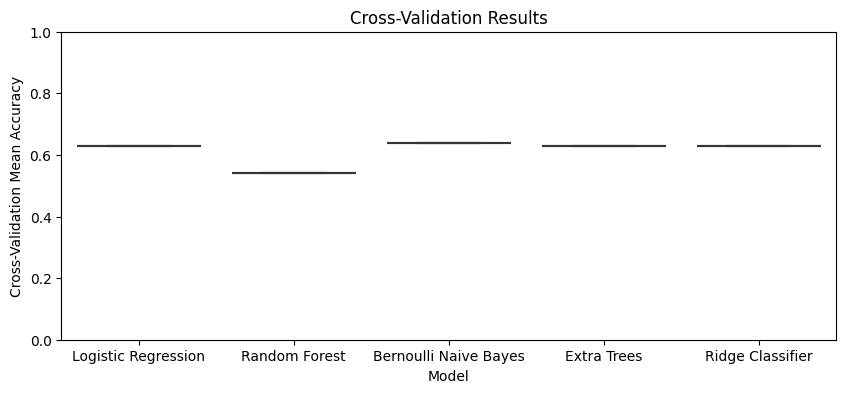

In [10]:
# Visualization 3 - Boxplot for Cross-validation results

plt.figure(figsize=(10, 4))
sns.boxplot(x='Model', y='Cross-Validation Mean Accuracy', data=cv_results, palette='viridis')
plt.title('Cross-Validation Results')
plt.ylim(0, 1)
plt.show()

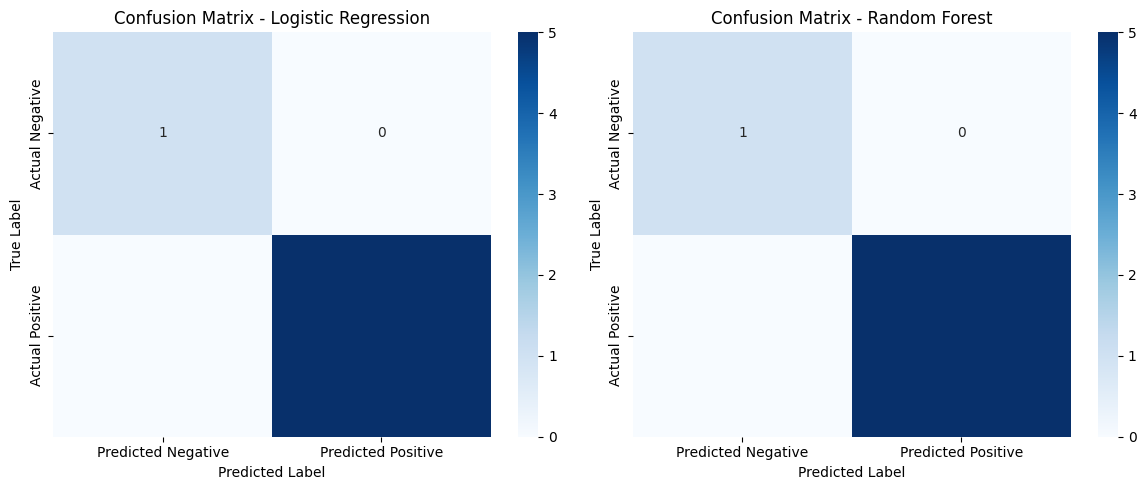

In [11]:
# Visualization 4 - Confusion Matrix Heatmap

# Logistic Regression
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(12, 5))  # Adjust the overall figure size as needed

plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot in the first position
sns.heatmap(logistic_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot in the second position
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

The **confusion matrix** heatmap above, shows the number of true positive, false positive, false negative, and true negative predictions for each model. 

Both Logistic Regression and Random Forest model had a good performance. Both models achieved a high number of true positives and true negatives, with zero instances of false positives or false negatives. This suggests that the model has a strong ability to accurately classify instances in both positive and negative classes. The absence of false positives and false negatives indicates a high precision and recall.

In [12]:
# F1 Score, Precision, Recall

metrics = ['f1-score', 'precision', 'recall']
metrics_df = pd.DataFrame(columns=['Model', 'F1 Score', 'Precision', 'Recall'])

for model, predictions in zip(models, [logistic_predictions, rf_predictions, nb_predictions, extra_trees_predictions, ridge_predictions]):
    report = classification_report(y_test, predictions, output_dict=True)
    
    metrics_df = metrics_df.append({
        'Model': model,
        'F1 Score': report['weighted avg']['f1-score'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall']
    }, ignore_index=True)

metrics_df

C:\Users\ACE\AppData\Local\Temp\ipykernel_11412\802864650.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\ACE\AppData\Local\Temp\ipykernel_11412\802864650.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\ACE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

,Model,F1 Score,Precision,Recall
0,Logistic Regression,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000
2,Bernoulli Naive Bayes,0.757576,0.694444,0.833333
3,Extra Trees,1.000000,1.000000,1.000000
4,Ridge Classifier,1.000000,1.000000,1.000000


**Metrics**

-  All models, except for Bernoulli Naive Bayes, achieved perfect scores in F1 Score, Precision, and Recall. 
-  Bernoulli Naive Bayes showed a slightly lower F1 Score but maintained a good balance between precision and recall. 
-  The results suggest that Logistic Regression, Random Forest, Extra Trees, and Ridge Classifier demonstrated their ability to make accurate predictions with high precision and recall.

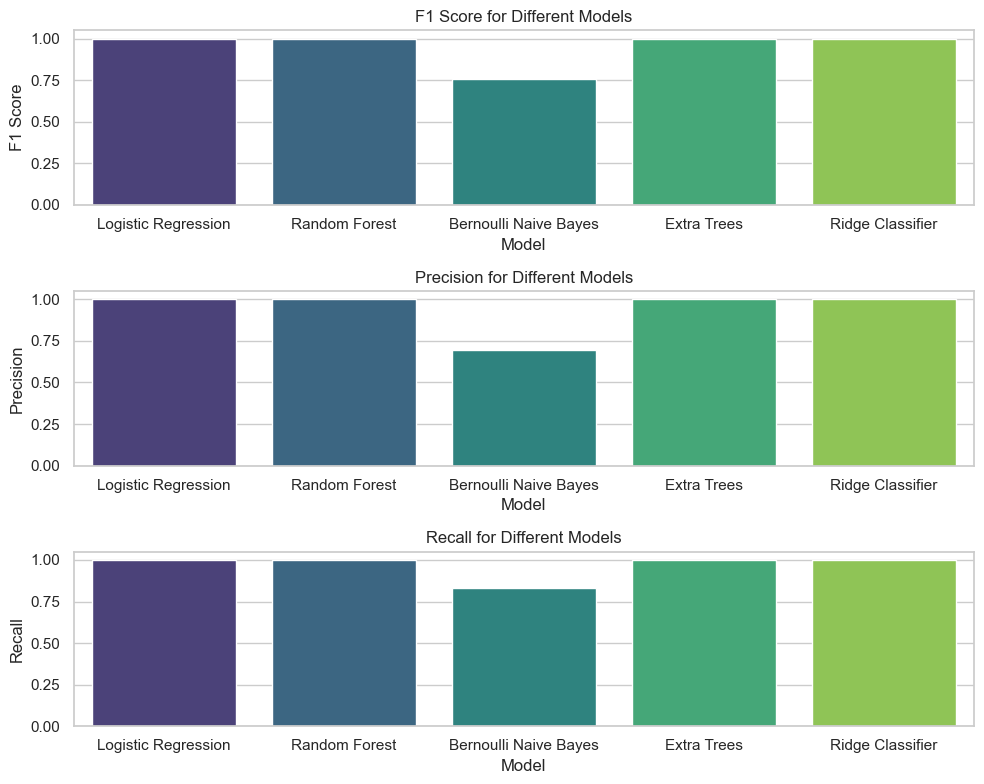

In [13]:
# Visualization 5 - Bar plots F1 score, precision and recall

sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))

# F1 Score
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='F1 Score', data=metrics_df, palette='viridis')
plt.title('F1 Score for Different Models')

# Precision
plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Precision for Different Models')

# Recall
plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Recall for Different Models')

plt.tight_layout()

plt.show()

In [14]:
# Biomarkers [Genes]

# Feature importances or coefficients
rf_feature_importances = rf_model.feature_importances_
lr_coefficients = logistic_model.coef_[0]
et_feature_importances = extra_trees_model.feature_importances_
ridge_coefficients = ridge_model.coef_[0]

# DataFrames with feature names and their importance/coefficient values
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
lr_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_coefficients})
et_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': et_feature_importances})
ridge_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_coefficients})

# Importance/coefficient values in ascending order
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=True)
lr_coefficients_df['Absolute_Coefficient'] = lr_coefficients_df['Coefficient'].abs()
lr_coefficients_df = lr_coefficients_df.sort_values(by='Absolute_Coefficient', ascending=True)
et_feature_importance_df = et_feature_importance_df.sort_values(by='Importance', ascending=True)
ridge_coefficients_df['Absolute_Coefficient'] = ridge_coefficients_df['Coefficient'].abs()
ridge_coefficients_df = ridge_coefficients_df.sort_values(by='Absolute_Coefficient', ascending=True)

# Top 10 genes for each model
top_10_rf_features = rf_feature_importance_df.tail(10)
top_10_lr_features = lr_coefficients_df.tail(10)
top_10_et_features = et_feature_importance_df.tail(10)
top_10_ridge_features = ridge_coefficients_df.tail(10)

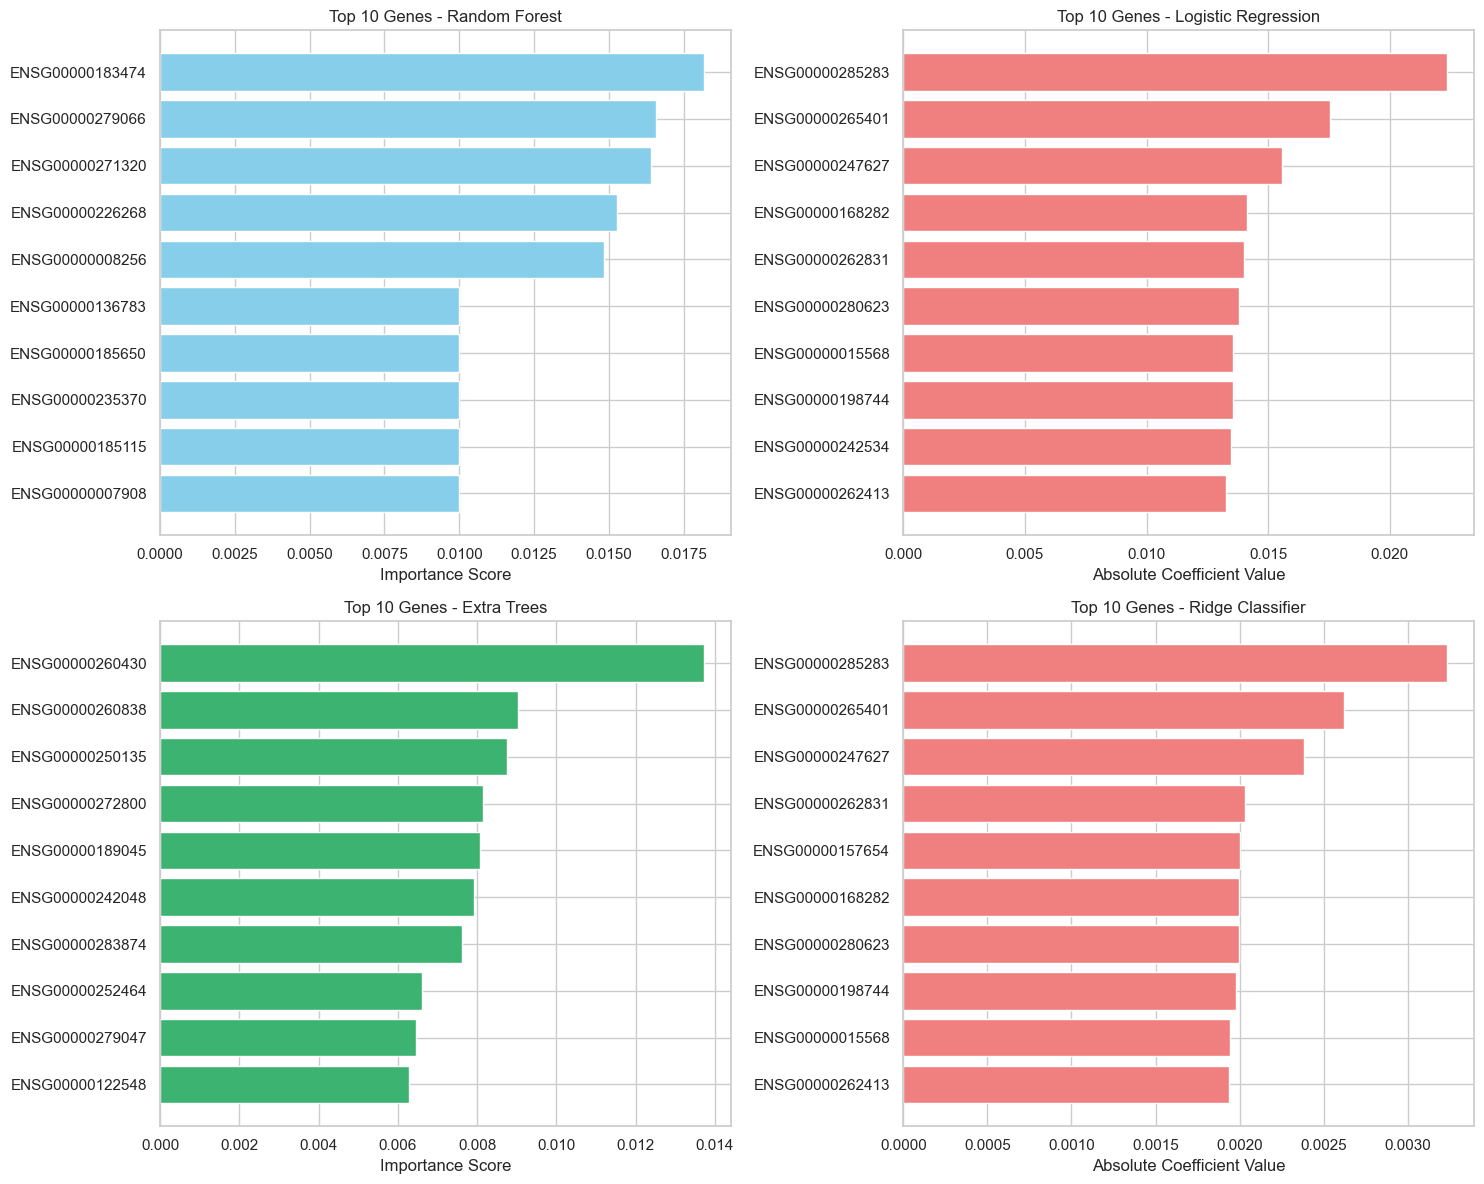

In [15]:
# Visualization 6 - Top 10 Genes from various models

# 2x2 subplot for visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Random Forest
axes[0, 0].barh(top_10_rf_features['Feature'], top_10_rf_features['Importance'], color='skyblue')
axes[0, 0].set_title('Top 10 Genes - Random Forest')
axes[0, 0].set_xlabel('Importance Score')

# Logistic Regression
axes[0, 1].barh(top_10_lr_features['Feature'], top_10_lr_features['Absolute_Coefficient'], color='lightcoral')
axes[0, 1].set_title('Top 10 Genes - Logistic Regression')
axes[0, 1].set_xlabel('Absolute Coefficient Value')

# Extra Trees
axes[1, 0].barh(top_10_et_features['Feature'], top_10_et_features['Importance'], color='mediumseagreen')
axes[1, 0].set_title('Top 10 Genes - Extra Trees')
axes[1, 0].set_xlabel('Importance Score')

# Ridge Classifier
axes[1, 1].barh(top_10_ridge_features['Feature'], top_10_ridge_features['Absolute_Coefficient'], color='lightcoral')
axes[1, 1].set_title('Top 10 Genes - Ridge Classifier')
axes[1, 1].set_xlabel('Absolute Coefficient Value')

plt.tight_layout()
plt.show()

The top 10 genes for each respective model was determined based on either absolute coefficient values or importance scores. These genes are considered crucial in influencing the models' predictions. More so, certain genes across were repeated across different models. This may suggest a consistent relevance in different contexts.

In [16]:
# UNSUPERVISED LEARNING

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

data_for_clustering = prca.drop(["ID", "class"], axis=1)

# Standardization
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)  
hc_labels = hc.fit_predict(data_for_clustering_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)  
kmeans_labels = kmeans.fit_predict(data_for_clustering_scaled)

# t-SNE
tsne = TSNE(n_components=2, perplexity=10, random_state=0)
tsne_result = tsne.fit_transform(data_for_clustering_scaled)

C:\Users\ACE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


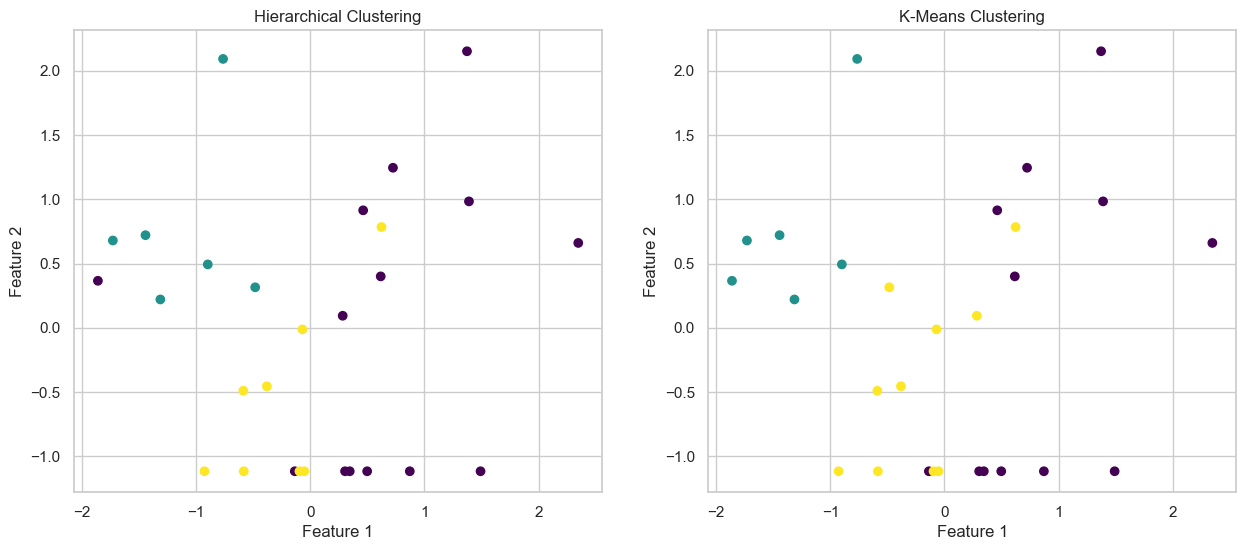

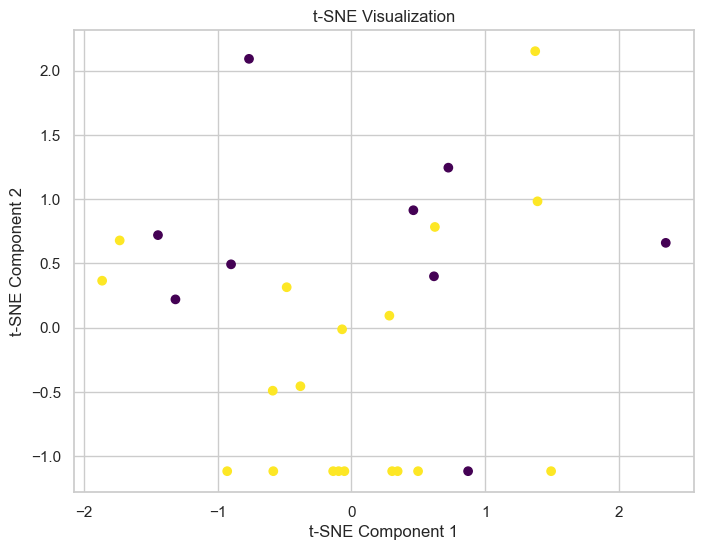

In [17]:
# Visualization 7 - Scatterplot for Hierarchical, K-Means Clustering and t-SNE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Hierarchical Clustering
axes[0].scatter(data_for_clustering_scaled[:, 0], data_for_clustering_scaled[:, 1], c=hc_labels, cmap='viridis')
axes[0].set_title('Hierarchical Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# K-Means Clustering
axes[1].scatter(data_for_clustering_scaled[:, 0], data_for_clustering_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axes[1].set_title('K-Means Clustering')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.show()

# t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(data_for_clustering_scaled[:, 0], data_for_clustering_scaled[:, 1], c=prca['class'], cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

1. **Hierarchical Clustering:**
   - Groups similar data points into clusters in a hierarchical structure.

2. **K-means Clustering:**
   - Divides data points into 'k' clusters based on similarity.

3. **t-SNE (t-Distributed Stochastic Neighbor Embedding):**
   - Dimensionality reduction for visualizing high-dimensional data in two or three dimensions.
  
From the scatterplots above, there is high similarity between the 3 models. The proximity of points reflects their effective grouping and similarity in the high-dimensional space.

C:\Users\ACE\anaconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


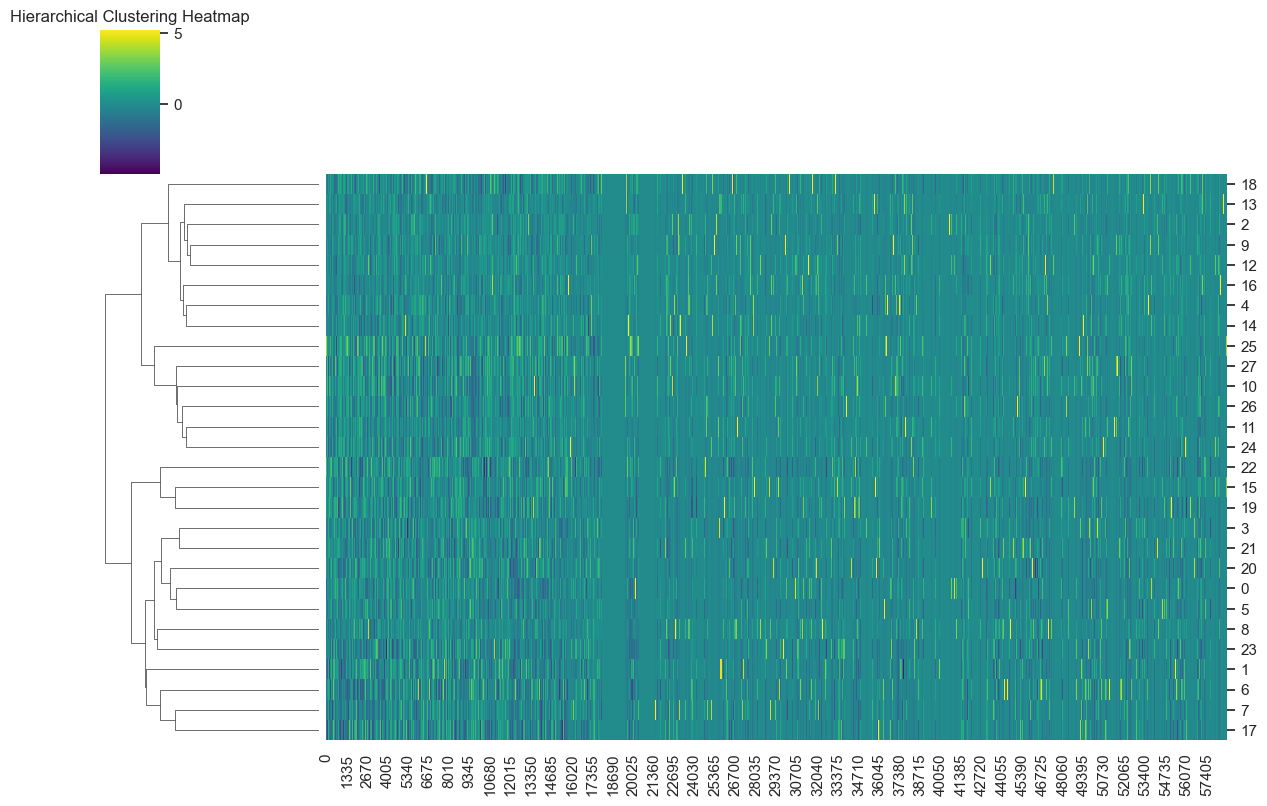

In [18]:
# Visualization 8 - Dendrogram Heatmap

clustered_data = sns.clustermap(data_for_clustering_scaled, method='complete', col_cluster=False, cmap='viridis', figsize=(12, 8))
plt.title('Hierarchical Clustering Heatmap')
plt.show()

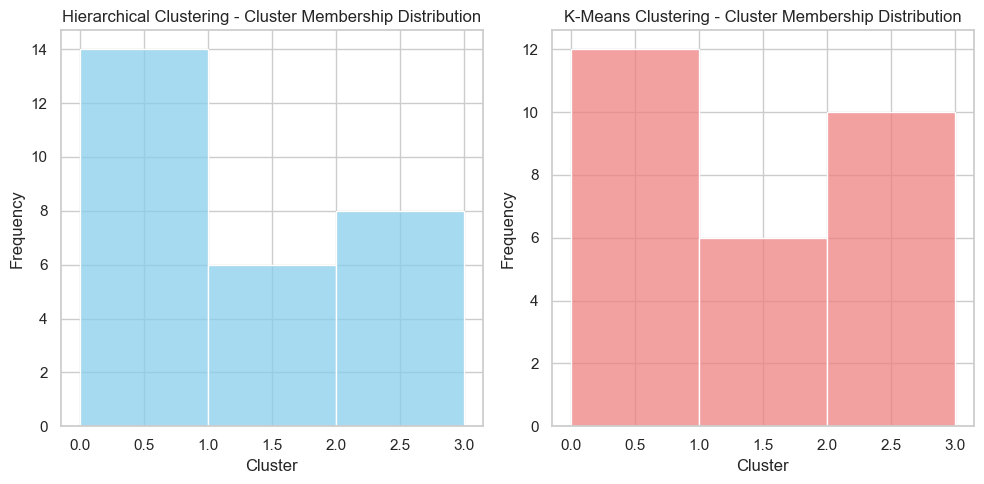

In [19]:
# Visualization 9 - Cluster Membership Distributions

# Cluster Membership Distributions
plt.figure(figsize=(10, 5))

# Hierarchical Clustering
plt.subplot(1, 2, 1)
sns.histplot(hc_labels, bins=range(4), kde=False, color='skyblue')
plt.title('Hierarchical Clustering - Cluster Membership Distribution')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# K-Means Clustering
plt.subplot(1, 2, 2)
sns.histplot(kmeans_labels, bins=range(4), kde=False, color='lightcoral')
plt.title('K-Means Clustering - Cluster Membership Distribution')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Cluster Membership Distributions:**

- Cluster membership distribution refers to the distribution of data points across various clusters in a clustering analysis.

From the Cluster membership distribution on both hierarchical and k-means clustering above, certain clusters may more populated than others - much more concentrated at the 0.0 to 1.0 cluster, this suggests an imbalanced distribution.

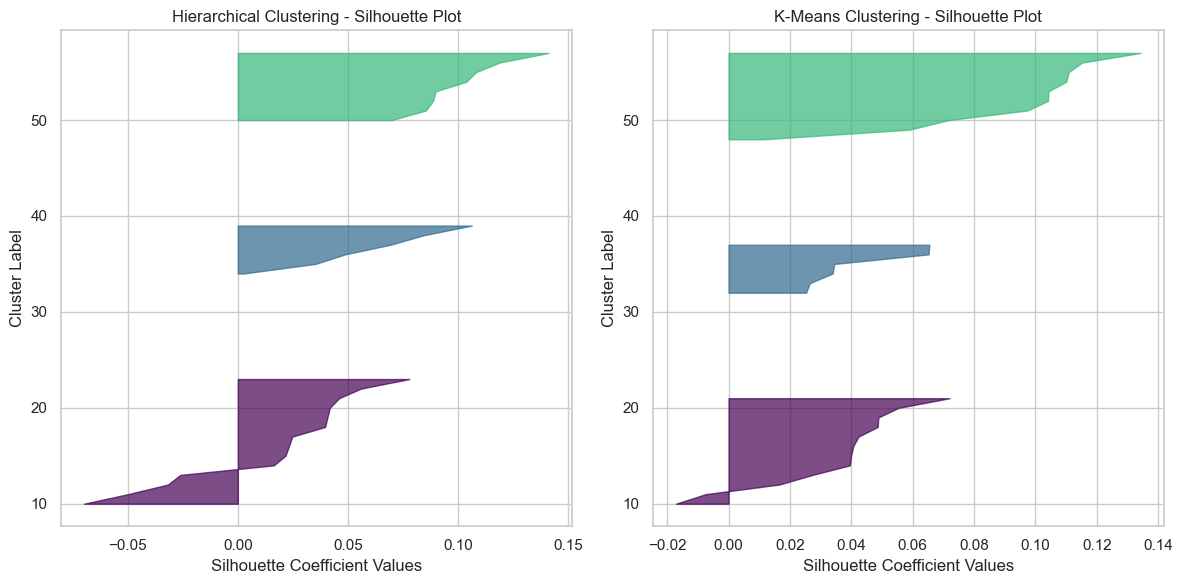

In [20]:
# Visualization 10 - Silhouette Plot

# Library
from sklearn.metrics import silhouette_samples, silhouette_score

plt.figure(figsize=(12, 6))

# Hierarchical Clustering
plt.subplot(1, 2, 1)
silhouette_avg_hc = silhouette_score(data_for_clustering_scaled, hc_labels)
sample_silhouette_values_hc = silhouette_samples(data_for_clustering_scaled, hc_labels)
y_lower = 10

for i in range(3):  # Number of clusters
    ith_cluster_silhouette_values = sample_silhouette_values_hc[hc_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

plt.title('Hierarchical Clustering - Silhouette Plot')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')

# K-Means Clustering
plt.subplot(1, 2, 2)
silhouette_avg_kmeans = silhouette_score(data_for_clustering_scaled, kmeans_labels)
sample_silhouette_values_kmeans = silhouette_samples(data_for_clustering_scaled, kmeans_labels)
y_lower = 10

for i in range(3):  # Number of clusters
    ith_cluster_silhouette_values = sample_silhouette_values_kmeans[kmeans_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

plt.title('K-Means Clustering - Silhouette Plot')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')

plt.tight_layout()
plt.show()

**Metric:**
   - Silhouette plots measure how well each data point fits into its assigned cluster.

The silhouette score for both hierarchical and k-means clustering are not cohesive and well-separated clusters, but neither do they suggest potential overlap or ambiguity in cluster assignments. Their respective points are on the boundary between two clusters and could potentially belong to either one. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


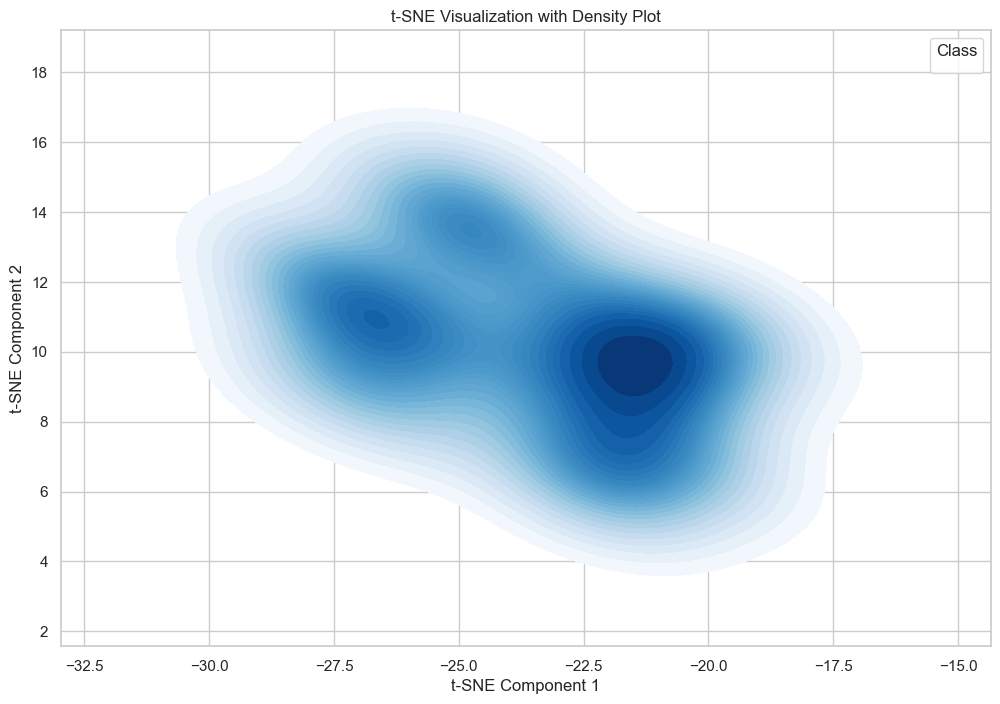

In [21]:
# Visualization 11 - Density plot for t-SNE

plt.figure(figsize=(12, 8))

# Density plot for t-SNE
sns.kdeplot(x=tsne_result[:, 0], y=tsne_result[:, 1], cmap='Blues', fill=True, levels=30)

plt.title('t-SNE Visualization with Density Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Class', loc='upper right')

plt.show()

The **density plot** shows the density of points in the reduced space.

The density plot indicates the data points are concentrated.